In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam
import keras
from keras.models import Sequential
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras import layers
import cv2
from keras.preprocessing.image import ImageDataGenerator
import splitfolders
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [3]:
path = "C:/Users/miro/Desktop/wercia/Bootcamp/DL project/lego set/kopia do testu streamlita"
splitfolders.ratio(path,seed=1337, output="5 folders", ratio=(0.8, 0.2))

Copying files: 20000 files [00:42, 470.38 files/s]


In [4]:
train_data_dir = 'C:/Users/miro/Desktop/wercia/Bootcamp/DL project/5 folders/train'
test_data_dir = 'C:/Users/miro/Desktop/wercia/Bootcamp/DL project/5 folders/val'

In [5]:
image_width = 64
image_height = 64
batch_size = 200
input_shape = (image_height, image_width, 3)

In [6]:
datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(image_width, image_height),
        batch_size=batch_size,
        class_mode='categorical')  

test_generator = datagen.flow_from_directory(
        test_data_dir,
        target_size=(image_width, image_height),
        batch_size=batch_size,
        class_mode='categorical') 

Found 16000 images belonging to 5 classes.
Found 4000 images belonging to 5 classes.


In [16]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [17]:
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_14 (Bat  (None, 62, 62, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 62, 62, 32)        9248      
                                                                 
 batch_normalization_15 (Bat  (None, 62, 62, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                      

In [18]:
models_dir = "saved_models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

checkpointer = ModelCheckpoint(filepath='saved_models/model5.hdf5', 
                               monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.001)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [20]:
history1 = model5.fit(train_generator, epochs = 20, validation_data = train_generator, callbacks=callbacks)

Epoch 1/20
80/80 [==============================] - ETA: 0s - loss: 1.7238 - accuracy: 0.3311
Epoch 1: val_accuracy improved from -inf to 0.20000, saving model to saved_models\model5.hdf5
80/80 [==============================] - 409s 5s/step - loss: 1.7238 - accuracy: 0.3311 - val_loss: 2.2466 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 2/20
80/80 [==============================] - ETA: 0s - loss: 1.2707 - accuracy: 0.4684
Epoch 2: val_accuracy did not improve from 0.20000
80/80 [==============================] - 369s 5s/step - loss: 1.2707 - accuracy: 0.4684 - val_loss: 1.9605 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 3/20
80/80 [==============================] - ETA: 0s - loss: 0.9641 - accuracy: 0.6067
Epoch 3: val_accuracy improved from 0.20000 to 0.21338, saving model to saved_models\model5.hdf5
80/80 [==============================] - 331s 4s/step - loss: 0.9641 - accuracy: 0.6067 - val_loss: 1.7862 - val_accuracy: 0.2134 - lr: 0.0010
Epoch 4/20
80/80 [=============================

In [22]:
def plot_train_history(history):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

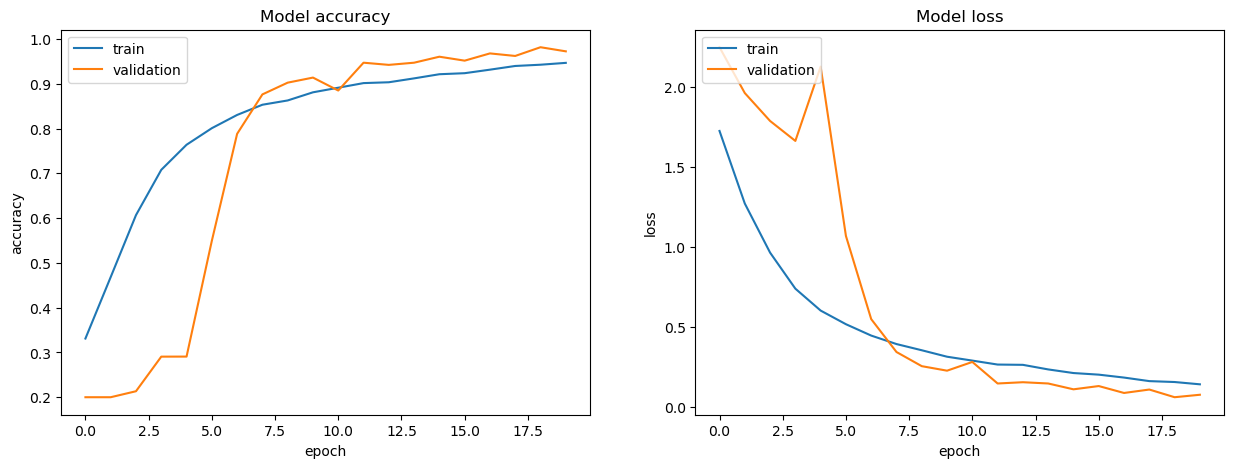

In [23]:
model5.load_weights('saved_models/model5.hdf5')
plot_train_history(history1)